In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# ВЫБОР ТЕМЫ
Мною был найден датасет с информацией о влиянии музыки на психологическое состояние человека (тревожности, депрессии, бессоницы, ОКР и в целом настроения). Планируется провести EDA (разведовательный анализ данных), визуализация, после выдвижение гипотез, их проверка и предсказание наличия заболеваний или влияние на настроение с помощью машинного обучения.

In [114]:
data = pd.read_csv('mxmh_survey_results.csv')
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# Предварительная обработка данных

Данные были взяты с сайта Kaggle, датасет содержит информацию о 737 респондентах и следующих характеристиках:
- `Timestamp` - время ответа на опросник
- `Age` - возраст
- `Primary streaming service` - основной сервис, использующийся для прослушивания музыки
- `Hours per day` - количество часов прослушивания музыки в день
-` While working `- слушает ли человек музыку во время работы
- `Instrumentalist` - играет ли человек на музыкальных инструментах регулярно
- `Composer` - сочиняет ли респондент музыку
- `Fav genre` - любимый жанр
- `Exploratory` - ищет ли респондент новые жанры или исполнителей
- `Foreign languages` - слушает ли человек музыку на языке, на котором не говорит свободно
- `BPM `- количество ударов в минуту у любимого жанра
- `Frequency [Classical]` - насколько часто респондент слушает классическую музыку
- `Frequency [Country]`- насколько часто респондент слушает кантри
- `Frequency [EDM]` - насколько часто респондент слушает EDM, то есть электронную танцевальную музыку
- `Frequency [Folk]` - насколько часто респондент слушает фолк
-` Frequency [Gospel]` - насколько часто респондент слушает госпел
- `Frequency [Hip hop]` - насколько часто респондент слушает хип-хоп
- `Frequency [Jazz]` - насколько часто респондент слушает джаз
- `Frequency [K pop]` - насколько часто респондент слушает К-поп
- `Frequency [Latin]` - насколько часто респондент слушает латинскую музыку
- `Frequency [Lofi]` - насколько часто респондент слушает Lo-Fi
- `Frequency [Metal]` - насколько часто респондент слушает метал
- `Frequency [Pop]` - насколько часто респондент слушает поп
- `Frequency [R&B] `- насколько часто респондент слушает R&B
- `Frequency [Rap]` - насколько часто респондент слушает реп
- `Frequency [Rock]` - насколько часто респондент слушает рок
- `Frequency [Video game music]` - насколько часто респондент слушает музыку из видео-игр
- `Anxiety` - частота испытывания тревожности
- `Depression` - частота испытывания депрессии
- `Insomnia` - частота бессоницы
- `OCD` - частота испытывания синдромов обсессивно-компульсивного расстройства
- `Music effects` - эффект музыки на настроение
- `Permissions` - дает ли респондент разрешение на публикацию данных


In [ ]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

**Интерпретация частоты тревожности, депрессии, бессоницы, ОКР**
- 0 - Я не испытываю этого
- 10 - Я испытываю это регулярно/постоянно

Напишем функцию, которая заменит категориальные переменные о частоте прослушивания определенного жанра на
- 0 (никогда),
- 1 (редко),
- 2 (иногда),
- 3 (очень часто)

А значения 'Yes' или 'No' на 1 или 0 соответственно

In [35]:
def correct_values_frequency(value: str):
     corrected_value = float(value.replace('Very frequently', '3').replace('Sometimes', '2').replace('Rarely', '1').replace('Never', '0'))
     return corrected_value

In [36]:
def correct_values_bin(value: str):
     corrected_value = int(value.replace('Yes', '1').replace('No', '0'))
     return corrected_value

In [44]:
def correct_values_mood(value: str):
     corrected_value = int(value.replace('Worsen', '-1').replace('No effect', '0').replace('Improve', '1'))
     return corrected_value

In [115]:
data[[ 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']] = data[[ 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']].applymap(correct_values_frequency, na_action = 'ignore')


In [116]:
data[['While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages']]= data[['While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages']].applymap(correct_values_bin, na_action = 'ignore')

In [117]:
data[['Music effects']]=data[['Music effects']].applymap(correct_values_mood, na_action = 'ignore')

In [46]:
data.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,156.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,119.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,132.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,0.0,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,84.0,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,1.0,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,107.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,1.0,I understand.


Посмотрим на типы данных в таблице.

In [ ]:
data.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                   float64
Instrumentalist                 float64
Composer                        float64
Fav genre                        object
Exploratory                       int64
Foreign languages               float64
BPM                             float64
Frequency [Classical]           float64
Frequency [Country]             float64
Frequency [EDM]                 float64
Frequency [Folk]                float64
Frequency [Gospel]              float64
Frequency [Hip hop]             float64
Frequency [Jazz]                float64
Frequency [K pop]               float64
Frequency [Latin]               float64
Frequency [Lofi]                float64
Frequency [Metal]               float64
Frequency [Pop]                 float64
Frequency [R&B]                 float64
Frequency [Rap]                 float64


Посмотрим на количество пропусков.  
- Пропуск в графе "Возраст" заполним модой возраста (пропуск в одном объекте не так значителен)
- Пропуски в признаке "Основной стриминг сервис" заполним модой
- В пропусках "Слушает ли музыку во время работы" поставим "no"
- В пропусках "Играет ли на инструменте" поставим "no"
- В пропусках "Сочиняет ли музыку" поставим "no"
- В пропусках "Слушает ли на иностранных языках" поставим "no"
- В пропусках "Экспериментирует ли с жанрами/исполнителями" поставим "no"
- Столбец BMP, скорее всего, придется удалить, так как в нем слишком много пропусков (около 15% от всех наблюдений). Но пока что делать этого не будем, вдруг будет какое-то влияние, например, на тревожность. Пока оставим медиану.
- В пропуски в "музыкальный эффект" поставим "No effect", то есть 0

То есть, чтобы избежать в дальнейшем неверных гипотез или некорректного обучения моделей в пропусках при бинарных признаках мы поставили значение "нет", чтобы исключить ложные зависимости.


In [ ]:
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [118]:
data['Age'].fillna(data['Age'].mode()[0], inplace=True)
data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0], inplace=True)
data['While working'].fillna(0, inplace=True)
data['Instrumentalist'].fillna(0, inplace=True)
data['Composer'].fillna(0, inplace=True)
data['Foreign languages'].fillna(0, inplace=True)
data['BPM'].fillna(data['BPM'].median(), inplace=True)
data['Music effects'].fillna(0, inplace=True)

In [ ]:
data.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

Удалим столбец Permissions, так как все присутствующие в опросе респонденты дали согласие на использование данных. И превратим столбец со временем в datetime формат.

In [137]:
del data['Permissions']

In [119]:
del data['Timestamp']

In [120]:
data.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                   float64
Instrumentalist                 float64
Composer                        float64
Fav genre                        object
Exploratory                       int64
Foreign languages               float64
BPM                             float64
Frequency [Classical]           float64
Frequency [Country]             float64
Frequency [EDM]                 float64
Frequency [Folk]                float64
Frequency [Gospel]              float64
Frequency [Hip hop]             float64
Frequency [Jazz]                float64
Frequency [K pop]               float64
Frequency [Latin]               float64
Frequency [Lofi]                float64
Frequency [Metal]               float64
Frequency [Pop]                 float64
Frequency [R&B]                 float64
Frequency [Rap]                 float64
Frequency [Rock]                float64


# EDA и визуализация данных


In [121]:
pd.set_option('display.max_columns', None)

In [122]:
data.describe()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,25.197011,3.572758,0.786685,0.319293,0.171196,0.713315,0.548913,1.358818e+06,1.335598,0.817935,1.023098,1.012228,0.381793,1.384511,1.027174,0.735054,0.607337,1.067935,1.220109,2.031250,1.259511,1.335598,2.070652,1.250000,5.837636,4.796196,3.738451,2.637228,0.713315
std,12.049695,3.028199,0.409927,0.466520,0.376936,0.452521,0.497940,3.686048e+07,0.988442,0.922584,1.048878,1.009405,0.701520,1.031598,0.938559,1.002945,0.864666,1.027912,1.134698,0.934801,1.058451,1.053732,1.034327,1.071587,2.793054,3.028870,3.088689,2.842017,0.501032
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,18.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.050000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,21.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.200000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.000000,5.000000,3.000000,2.000000,1.000000
75%,28.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.400000e+02,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,8.000000,7.000000,6.000000,5.000000,1.000000
max,89.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+09,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Видно, что есть какой то выброс по BPM - давайте посмотрим.
Понятно, что человек либо не знал, что это, либо ошибся. Заменим медианой.

In [123]:
data.loc[data['BPM'] > 600, 'BPM'] = data['BPM'].median()

Также мною было замечено, что есть люди, поставившие, что они слушают музыку более 20 часов в день, что, будем честны, маловероятно. Давайте на них посмотрим. Можно заметить, что двое из них поставили бессоницу, поэтому это может быть объяснимо - либо люди ставят себе белый шум под сон. Однако в ходе исследования данные нам мешали, поэтому было принято решение заменить в этих данных значение на медиану.


In [124]:
data.loc[data['Hours per day'] >= 20]
data.loc[data['Hours per day'] >= 20, 'Hours per day'] = data['Hours per day'].median()

Выводы:
- Средний возраст - 25 лет, то есть можно сказать, что в основном этот опрос распространялся среди молодых людей. Особенно это заметно по 75% квантилю. Скорее всего, взрослых и пожилых людей в опросе мало.
- В среднем, люди слушали музыку около 3,5 часов в день, что достаточно много. Также можно заметить, что кто-то отметил 24 часа в сутки в опросе, что маловероятно.

In [63]:
data['BPM'].unique() #ну ладно, вроде норм

array([156., 119., 132.,  84., 107.,  86.,  66.,  95.,  94., 155., 120.,
       125.,  88., 148., 103.,  99., 118.,  79., 169., 136., 101., 126.,
       183., 142.,  75.,  89., 140., 161.,  80., 130., 147.,  77., 115.,
       157.,  90., 128.,  96.,  91.,  55.,  85., 160., 108., 170., 174.,
       127., 165., 113., 167., 110., 150.,  93., 109., 175., 162., 189.,
       121., 200., 105., 193., 149., 134., 100.,  98.,  78., 117., 122.,
       179., 166., 144.,  61., 185.,  92., 194.,  60., 190.,  87., 171.,
       114., 141., 146., 164., 145., 112., 111., 172., 180.,  76., 129.,
        81.,  52.,  97., 143., 158., 104., 135., 220., 138., 139., 178.,
        62.,  72.,   0., 208.,  20., 124., 181., 106., 191.,  40., 173.,
       123.,   4.,  73., 137., 133., 102.,  82., 116., 131., 204., 159.,
        70., 210.,   8., 153., 192.,  56.,  63.,  68., 218., 186., 163.,
       168.])

In [125]:
data[[ 'Age', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD','Music effects']].corr()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
Age,1.000000,-0.093205,-0.084029,-0.126895,-0.034395,-0.179260,-0.135735,-0.029851,0.100334,0.122190,-0.101443,0.115128,0.147535,-0.138321,0.085783,-0.165445,0.085393,-0.214841,-0.014122,-0.181364,0.041003,-0.195090,0.055319,-0.262920,-0.177386,-0.121022,0.007363,-0.131122,-0.049450
Hours per day,-0.093205,1.000000,0.291256,-0.021582,0.142377,0.159064,0.110436,0.033212,-0.005311,0.069445,0.148615,0.116214,0.028260,0.149573,0.122860,0.097535,0.099613,0.118134,0.131143,0.004333,0.128179,0.168595,0.074013,0.057346,0.070545,0.140496,0.151378,0.133408,0.079107
While working,-0.084029,0.291256,1.000000,0.086291,0.051754,0.139285,0.121173,-0.013876,0.052680,-0.012894,0.134884,0.042481,0.042304,0.036575,0.089348,0.140324,0.085797,0.195882,0.025029,0.074227,0.102673,0.080913,-0.006121,0.127762,0.032689,0.054792,0.025184,0.077713,0.165545
Instrumentalist,-0.126895,-0.021582,0.086291,1.000000,0.400539,0.073282,-0.023396,-0.022038,0.245286,-0.041773,-0.090165,-0.014081,0.063516,-0.167813,0.185238,-0.039947,0.075132,-0.005574,0.049539,-0.107145,-0.110172,-0.118637,-0.010160,0.063276,0.027310,0.006157,0.025460,0.014111,0.095291
Composer,-0.034395,0.142377,0.051754,0.400539,1.000000,0.096692,-0.037426,-0.071808,0.097554,0.023240,0.024398,0.055280,0.071488,-0.015565,0.179121,-0.020214,0.035381,0.033149,0.093096,-0.046093,0.021490,-0.004403,0.049197,-0.008421,0.003176,0.050861,0.094605,0.012331,0.087330
Exploratory,-0.179260,0.159064,0.139285,0.073282,0.096692,1.000000,0.180059,0.006328,0.060261,0.041011,0.122897,0.138743,0.028108,0.218971,0.172131,0.162168,0.077013,0.223274,0.152206,0.175589,0.169743,0.236283,0.162513,0.027356,0.021250,0.061541,0.053356,0.032219,0.153077
Foreign languages,-0.135735,0.110436,0.121173,-0.023396,-0.037426,0.180059,1.000000,0.054419,0.106200,-0.060552,0.158042,0.084075,0.002942,0.152715,0.110689,0.316125,0.226369,0.184886,0.072423,0.082938,0.142387,0.167038,0.001206,0.196335,0.089115,0.091867,0.033763,-0.023497,0.004475
BPM,-0.029851,0.033212,-0.013876,-0.022038,-0.071808,0.006328,0.054419,1.000000,-0.049967,-0.035064,0.080716,-0.054644,-0.141651,-0.066814,-0.047683,0.006504,-0.118254,-0.054704,0.180429,-0.039911,-0.111734,-0.001419,0.113144,0.045202,0.020124,0.024823,0.036015,-0.027631,0.001204
Frequency [Classical],0.100334,-0.005311,0.052680,0.245286,0.097554,0.060261,0.106200,-0.049967,1.000000,-0.003029,-0.080976,0.109063,0.150487,-0.072017,0.302534,0.050013,0.135291,0.090013,-0.025919,0.004832,-0.000129,-0.126568,-0.075124,0.103081,-0.047259,-0.008253,0.076474,-0.007941,-0.019749
Frequency [Country],0.122190,0.069445,-0.012894,-0.041773,0.023240,0.041011,-0.060552,-0.035064,-0.003029,1.000000,0.005758,0.341339,0.237882,0.039347,0.062286,-0.040439,0.097869,-0.038588,0.099416,0.057088,0.051237,0.044743,0.177462,-0.063993,-0.009375,-0.043484,-0.051349,0.059096,0.078247


Выводы:
- Возраст коррелирует с прослушиванием Lo-Fi музыки и музыки для видеоигр
- Наличие депрессии немного коррелирует с частотой прослушивания рока, репа и метала, хотя значение не большое (около 0.2)
- На положительный эффект немного влияет фактор того, экспериментирует ли человек с музыкой и слушает во время работы.

Сделаем пару графичков.

<Axes: >

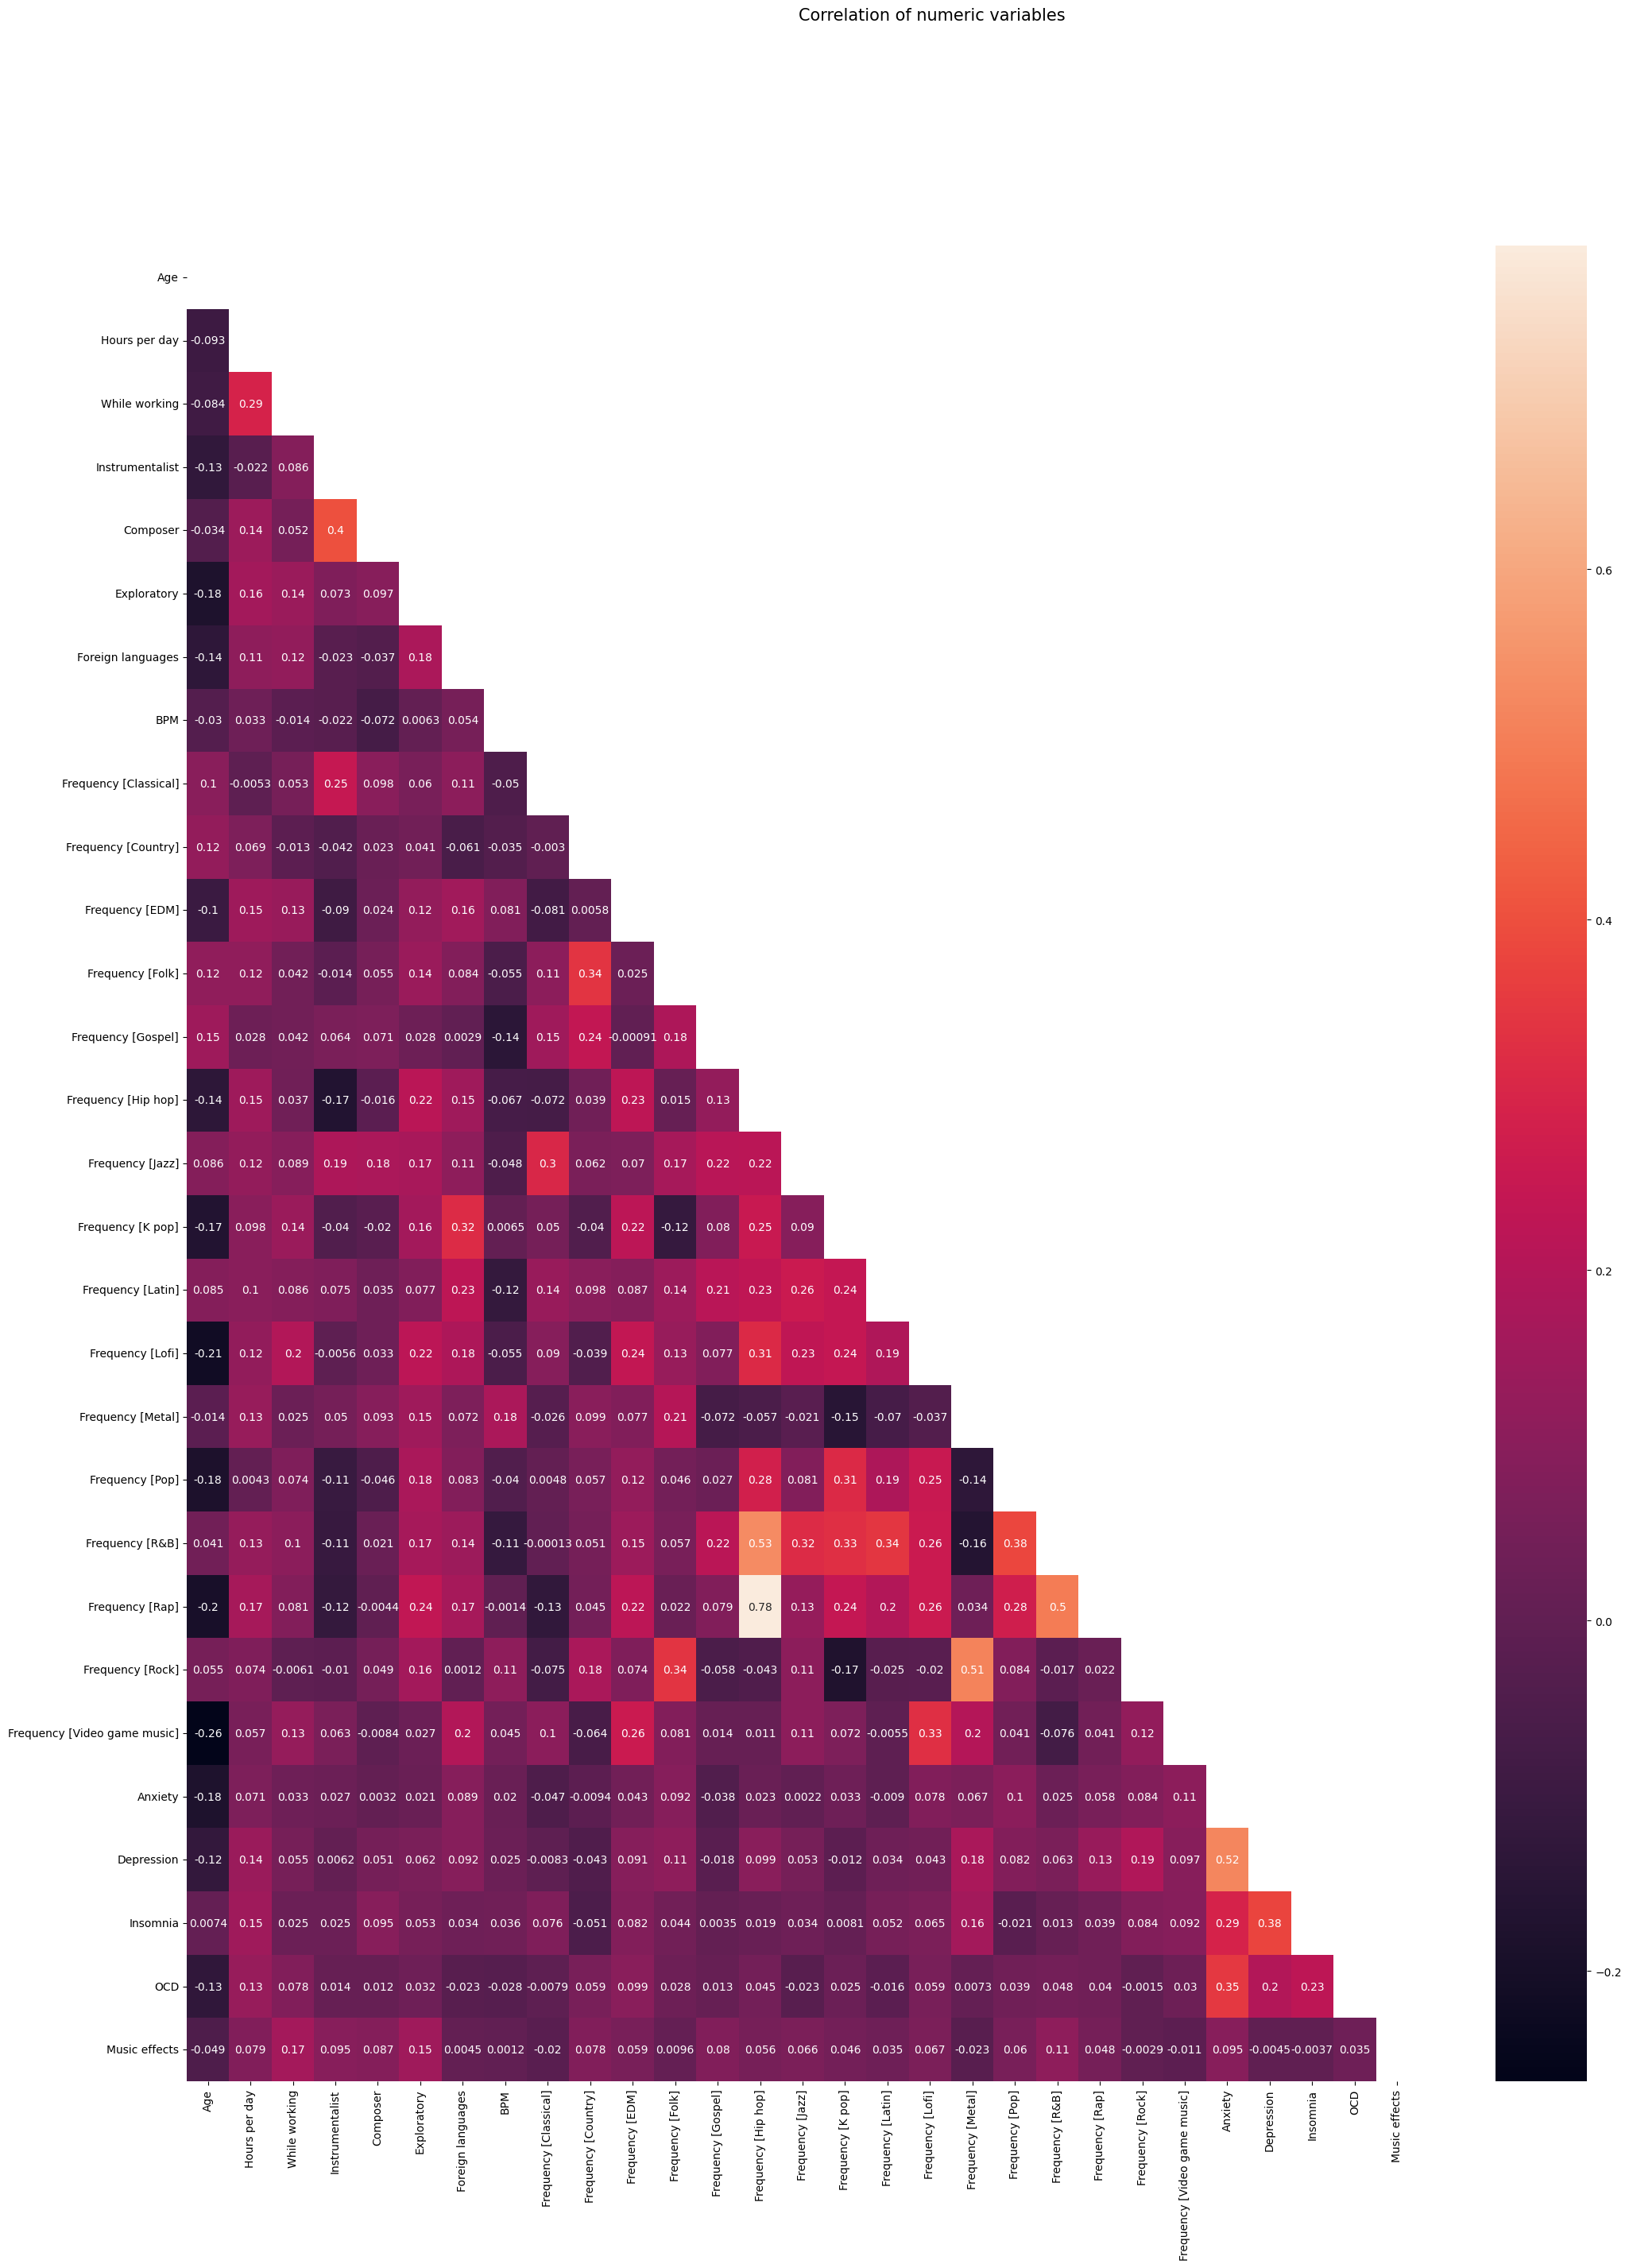

In [69]:
plt.figure(figsize=(25, 30))

plt.suptitle('Correlation of numeric variables', fontsize=15)
matrix = np.triu(data[[ 'Age', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD','Music effects']].corr())
sns.heatmap(data[[ 'Age', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD','Music effects']].corr(), annot=True, mask=matrix)

Выводы, в целом, те же, что и по таблице корреляции.

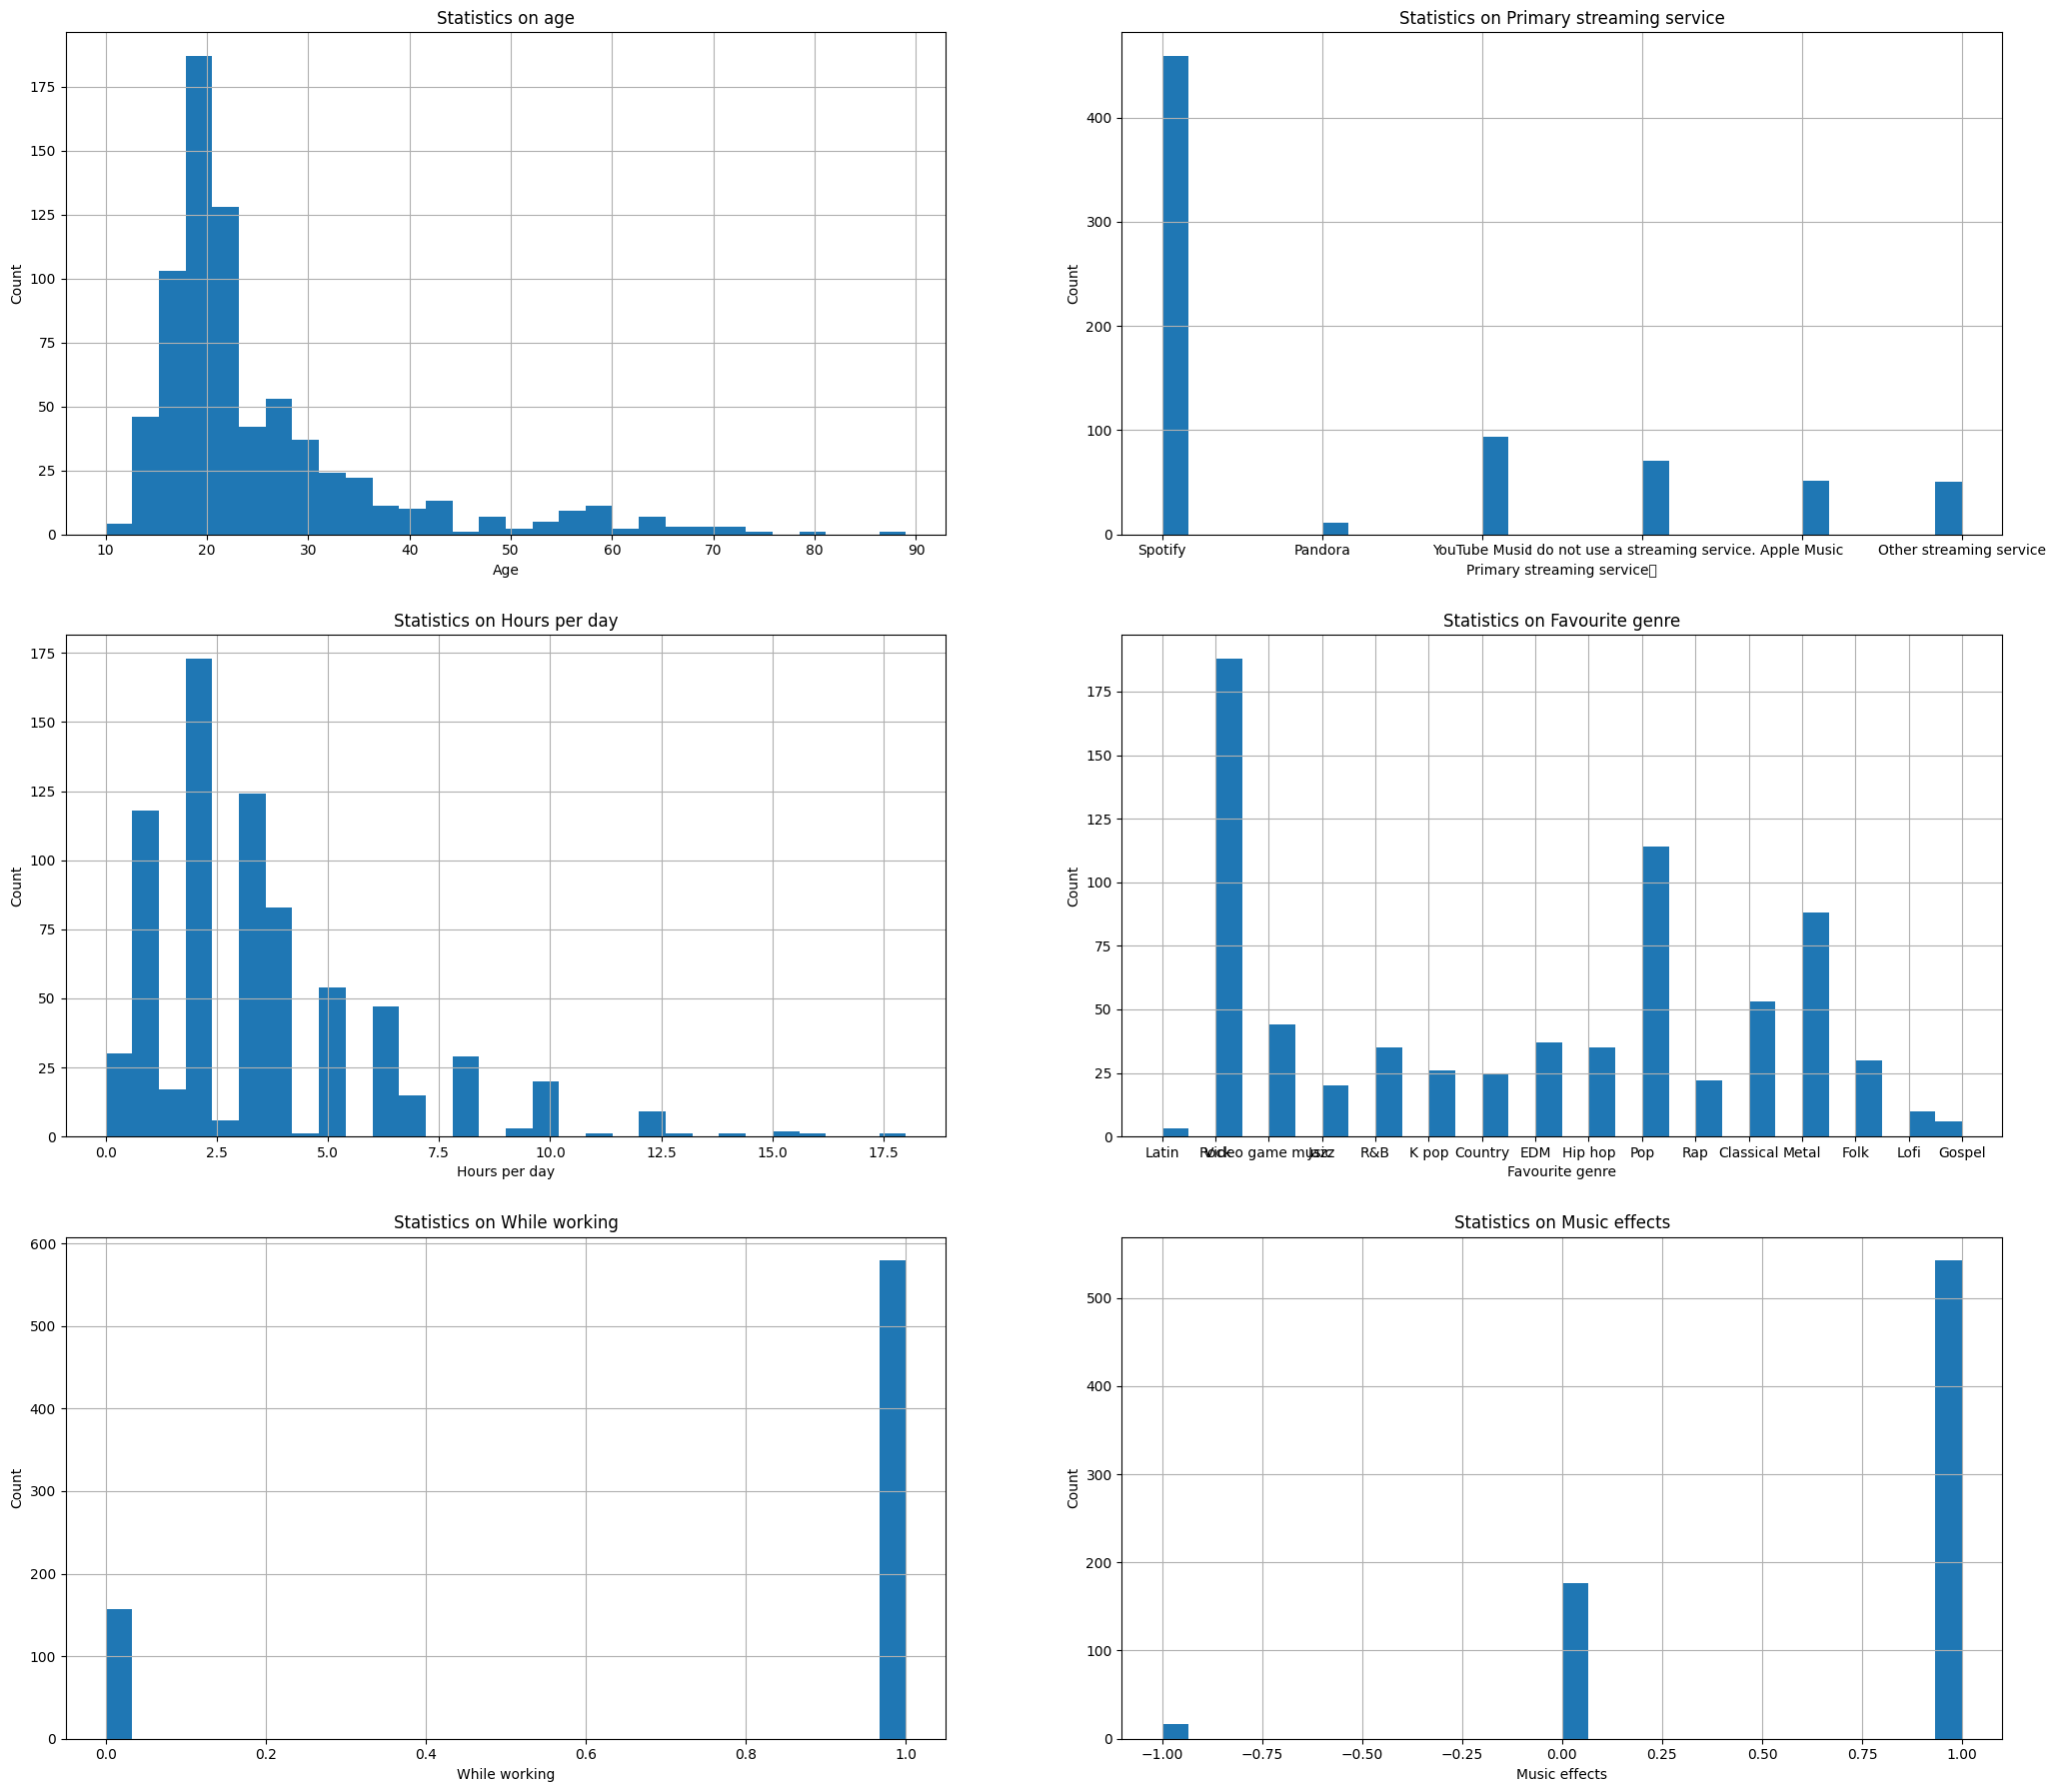

In [66]:
plt.figure(figsize=(25, 30))

sp = plt.subplot(421)
data['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Statistics on age');

sp = plt.subplot(422)
data['Primary streaming service'].hist(bins=30)
plt.xlabel('Primary streaming service	')
plt.ylabel('Count')
plt.title('Statistics on Primary streaming service');

sp = plt.subplot(423)
data['Hours per day'].hist(bins=30)
plt.xlabel('Hours per day')
plt.ylabel('Count')
plt.title('Statistics on Hours per day');

sp = plt.subplot(424)
data['Fav genre'].hist(bins=30)
plt.xlabel('Favourite genre')
plt.ylabel('Count')
plt.title('Statistics on Favourite genre');

sp = plt.subplot(425)
data['While working'].hist(bins=30)
plt.xlabel('While working')
plt.ylabel('Count')
plt.title('Statistics on While working');

sp = plt.subplot(426)
data['Music effects'].hist(bins=30)
plt.xlabel('Music effects')
plt.ylabel('Count')
plt.title('Statistics on Music effects');

- В основном, в датасете представлены данные по молодежи - от 12 до 40 лет.
- Большинство опрошенных используют Spotify для прослушивания музыки.
- Респонденты в основном слушают музыку 0-7.5 часов в день.
- Любимые жанры - рок, поп и метал.
- Большинство слушают музыку во время работы.
- У большей части опрошенных она улучшает настроение.



Text(0.5, 1.0, 'Influence of age on the hours of listening to music')

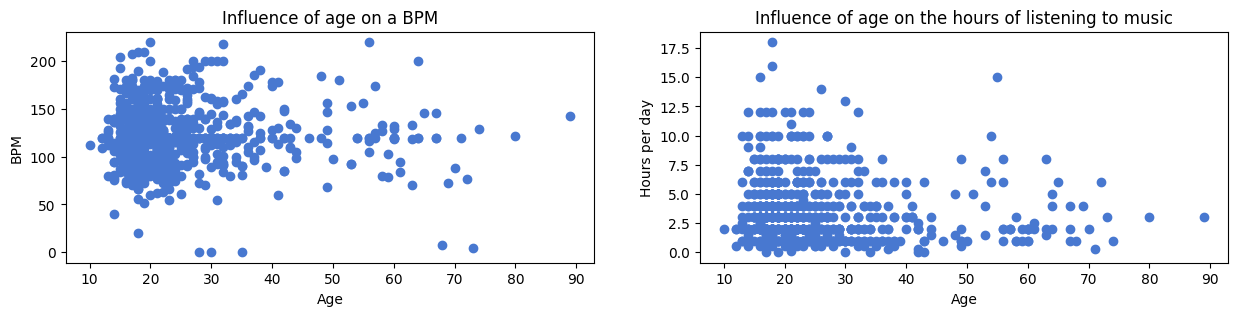

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15, 3))


ax1.scatter(data["Age"], data["BPM"])
ax1.set_xlabel("Age")
ax1.set_ylabel("BPM")
ax1.set_title("Influence of age on a BPM")

ax2.scatter(data["Age"], data["Hours per day"])
ax2.set_xlabel("Age")
ax2.set_ylabel("Hours per day")
ax2.set_title("Influence of age on the hours of listening to music")


Видно, что в большинстве своем быструю музыку слушает, в основном, люди до 50 лет. Также больше 10 часов в день слушает молодежь.


[Text(0.5, 1.0, 'Hours per day')]

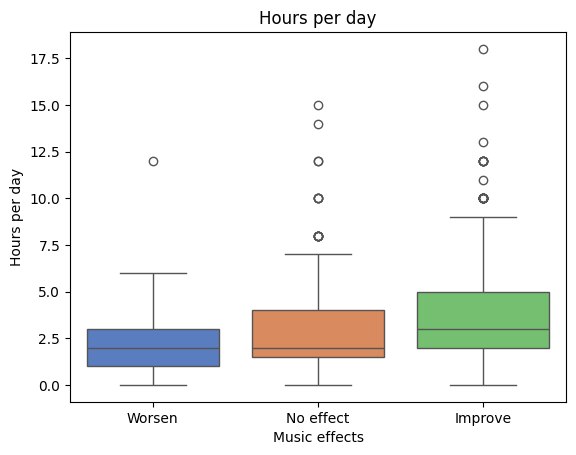

In [ ]:
sns.set_palette('muted')
new_data = data.sort_values('Music effects',ascending=False).reset_index()
sns.boxplot(hue='Music effects', x='Music effects', y='Hours per day', data=new_data[['Music effects', "Hours per day"]]).set(title='Hours per day')


Как будто количество прослушиваемых часов музыки влияет на улучшение настроения, но здесь возможно и обратная корреляция - то, что музыка улучшает настроение влияет на количество часов. Надо подумать..


[Text(0.5, 1.0, ''), Text(0.5, 0, '')]

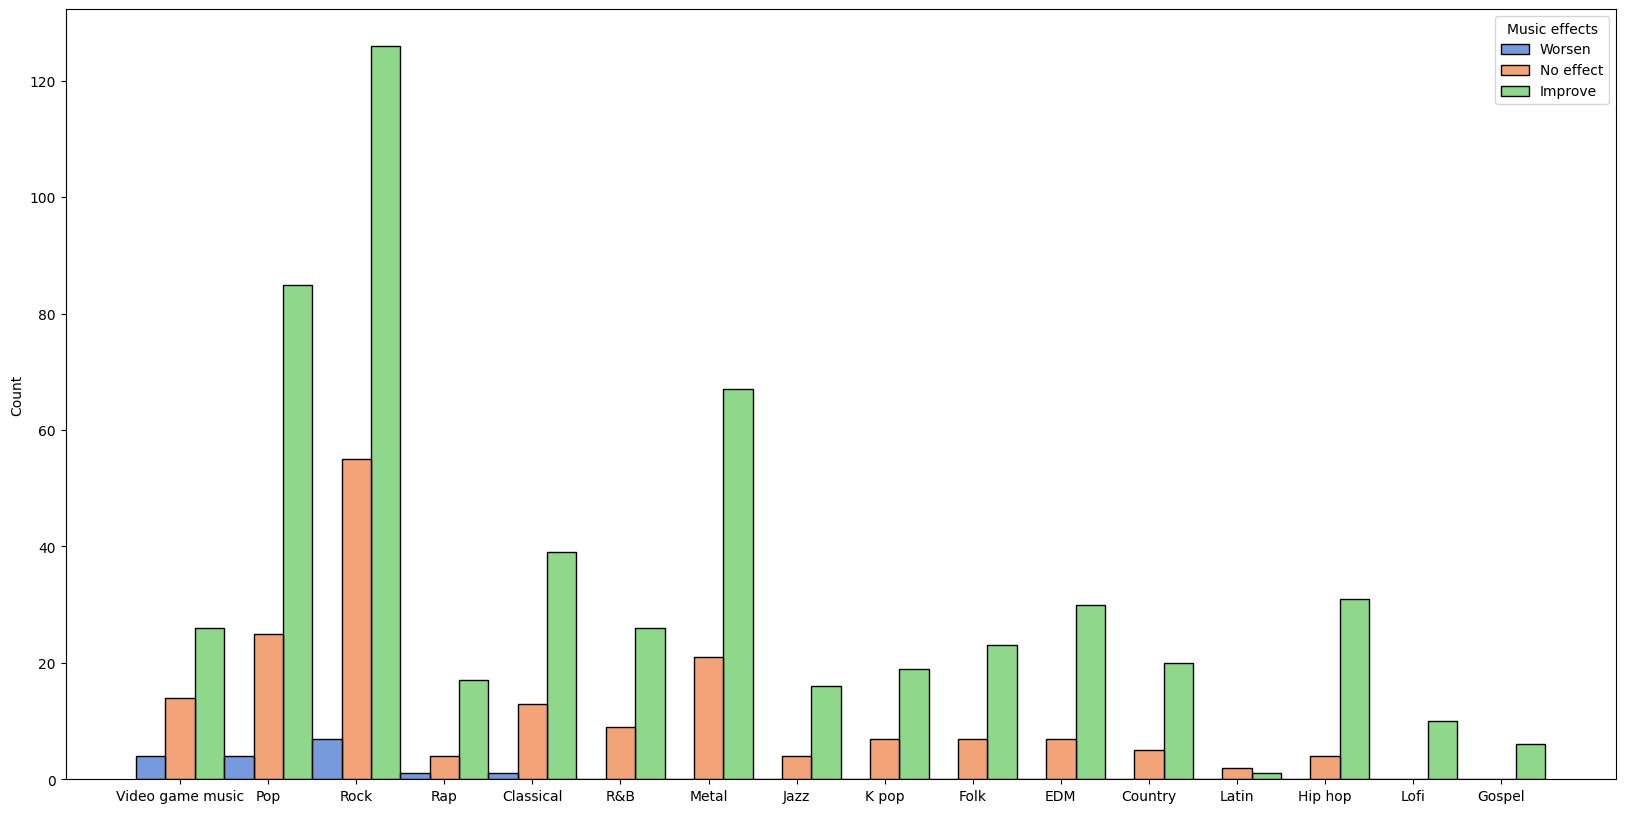

In [ ]:
plt.figure(figsize=(20,10))
new_data = data.sort_values('Music effects',ascending=False).reset_index()
sns.histplot(data=new_data[['Fav genre', 'Music effects']], x='Fav genre', hue='Music effects', multiple='dodge').set(title='',  xlabel='')


Видно, что чаще всего у музыка улучшает настроение. Можно сравнивать по относительной высоте - людей, у которых музыка улучшает настроение, больше в 3 раза, чем у тех, у кого не имеет эффекта (или эффект негативный) у следующих жанров: поп, реп, метал, джаз, EDM, кантри, хип-хоп.

Text(0.5, 1.0, 'Influence of hours per day on OCD')

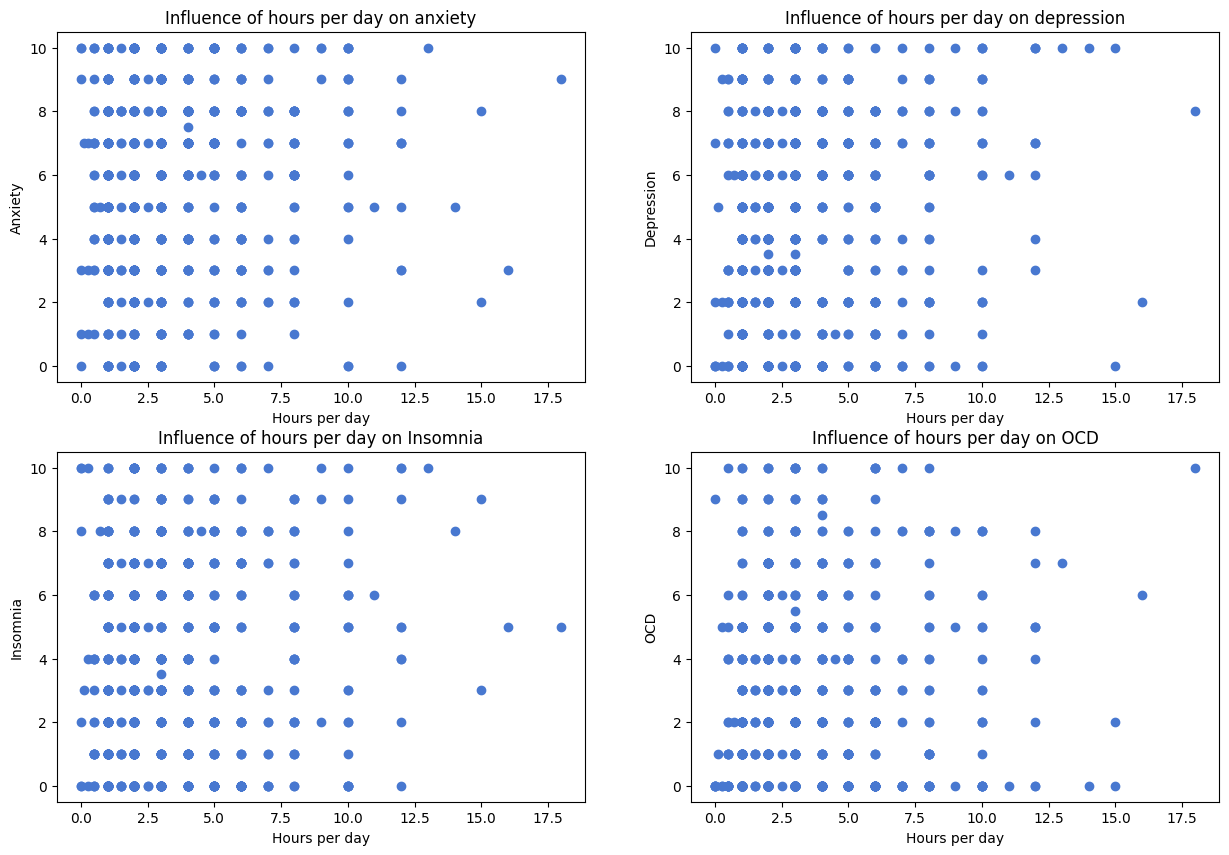

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10))


ax1.scatter(data["Hours per day"], data["Anxiety"])
ax1.set_xlabel("Hours per day")
ax1.set_ylabel("Anxiety")
ax1.set_title("Influence of hours per day on anxiety")

ax2.scatter(data["Hours per day"], data["Depression"])
ax2.set_xlabel("Hours per day")
ax2.set_ylabel("Depression")
ax2.set_title("Influence of hours per day on depression")

ax3.scatter(data["Hours per day"], data["Insomnia"])
ax3.set_xlabel("Hours per day")
ax3.set_ylabel("Insomnia")
ax3.set_title("Influence of hours per day on Insomnia")

ax4.scatter(data["Hours per day"], data["OCD"])
ax4.set_xlabel("Hours per day")
ax4.set_ylabel("OCD")
ax4.set_title("Influence of hours per day on OCD")

Как будто бы нет зависимостей уровня тревожности, депрессии, бессоницы или ОКР от количества часов.

<Axes: xlabel='Music effects', ylabel='Age'>

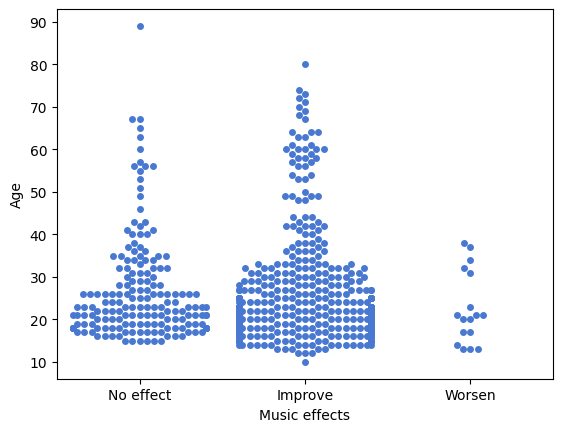

In [ ]:
sns.swarmplot(x='Music effects', y='Age', data=data[['Age', 'Music effects']])

Заметим, что как будто бы от музыки состояние ухудшается только у людей младше 40, но, скорее всего, это связано с тем, что мало информации о людях старшего возраста.

# Создание новых переменных

Создадим новую переменную - сумма показателей по уровням тревожности, депрессии, ОКР и бессоницы, чтобы увидеть негативный эффект на ментальное состояние человека.

In [130]:
data['Negative effects'] = data['Anxiety'] + data['Depression'] + data['OCD'] + data['Insomnia']
data.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Music lover,Artsy,Negative effects
0,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,156.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,I understand.,1,1,4.0
1,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,119.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,0.0,I understand.,0,0,12.0
2,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,132.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,0.0,I understand.,0,0,26.0
3,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,84.0,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,1.0,I understand.,0,0,22.0
4,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,107.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,1.0,I understand.,1,0,23.0


Сделаем график, распределение негативных эффектов похоже на нормальное.

<Axes: xlabel='Negative effects', ylabel='Count'>

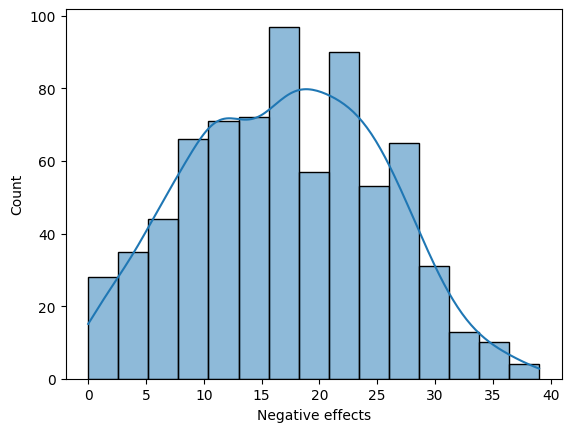

In [131]:
sns.histplot(data=data, x='Negative effects', kde=True)

Следующие два признака - бинарные. Первый, является ли человек любителем музыки - слушает ли больше 3 часов в день и во время работы. Второй признак - является человек творческим - сочиняет ли музыку и играет на музыкальном инструменте.

In [75]:
def music_lover(hours, working):
    if hours>=3 and working==1:
        return 1
    else:
        return 0

In [78]:
def artsy(instrument, composer):
    if instrument==1 and composer==1:
        return 1
    else:
        return 0

In [144]:
data['Music lover'] = data.apply(lambda x: music_lover(x['Hours per day'], x['While working']), axis =  1)
data['Artsy'] = data.apply(lambda x: artsy(x['Instrumentalist'], x['Composer']), axis =  1)
data.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Music lover,Artsy,Negative effects
0,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,156.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1,1,4.0
1,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,119.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,0.0,0,0,12.0
2,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,132.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,0.0,0,0,26.0
3,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,84.0,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,1.0,0,0,22.0
4,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,107.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,1.0,1,0,23.0


# Машинное обучение

In [202]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings("ignore")

In [112]:
data.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Negative effects', 'Music lover', 'Artsy'],
      dtype='object')

Я решила предсказывать именно искусственно созданную переменную - негативные эффекты. Закодируем категориальные переменные. Получится много столбцов, но таков путь...


Было принято решение не нормировать данные.

In [161]:
df = pd.get_dummies(data, columns=[ 'Primary streaming service', 'Fav genre', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]','Music effects' ])
df.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD,Music lover,Artsy,Negative effects,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,Frequency [Classical]_0.0,Frequency [Classical]_1.0,Frequency [Classical]_2.0,Frequency [Classical]_3.0,Frequency [Country]_0.0,Frequency [Country]_1.0,Frequency [Country]_2.0,Frequency [Country]_3.0,Frequency [EDM]_0.0,Frequency [EDM]_1.0,Frequency [EDM]_2.0,Frequency [EDM]_3.0,Frequency [Folk]_0.0,Frequency [Folk]_1.0,Frequency [Folk]_2.0,Frequency [Folk]_3.0,Frequency [Gospel]_0.0,Frequency [Gospel]_1.0,Frequency [Gospel]_2.0,Frequency [Gospel]_3.0,Frequency [Hip hop]_0.0,Frequency [Hip hop]_1.0,Frequency [Hip hop]_2.0,Frequency [Hip hop]_3.0,Frequency [Jazz]_0.0,Frequency [Jazz]_1.0,Frequency [Jazz]_2.0,Frequency [Jazz]_3.0,Frequency [K pop]_0.0,Frequency [K pop]_1.0,Frequency [K pop]_2.0,Frequency [K pop]_3.0,Frequency [Latin]_0.0,Frequency [Latin]_1.0,Frequency [Latin]_2.0,Frequency [Latin]_3.0,Frequency [Lofi]_0.0,Frequency [Lofi]_1.0,Frequency [Lofi]_2.0,Frequency [Lofi]_3.0,Frequency [Metal]_0.0,Frequency [Metal]_1.0,Frequency [Metal]_2.0,Frequency [Metal]_3.0,Frequency [Pop]_0.0,Frequency [Pop]_1.0,Frequency [Pop]_2.0,Frequency [Pop]_3.0,Frequency [R&B]_0.0,Frequency [R&B]_1.0,Frequency [R&B]_2.0,Frequency [R&B]_3.0,Frequency [Rap]_0.0,Frequency [Rap]_1.0,Frequency [Rap]_2.0,Frequency [Rap]_3.0,Frequency [Rock]_0.0,Frequency [Rock]_1.0,Frequency [Rock]_2.0,Frequency [Rock]_3.0,Frequency [Video game music]_0.0,Frequency [Video game music]_1.0,Frequency [Video game music]_2.0,Frequency [Video game music]_3.0,Music effects_-1.0,Music effects_0.0,Music effects_1.0
0,18.0,3.0,1.0,1.0,1.0,1,1.0,156.0,3.0,0.0,1.0,0.0,1,1,4.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False
1,63.0,1.5,1.0,0.0,0.0,1,0.0,119.0,7.0,2.0,2.0,1.0,0,0,12.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False
2,18.0,4.0,0.0,0.0,0.0,0,1.0,132.0,7.0,7.0,10.0,2.0,0,0,26.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False
3,61.0,2.5,1.0,0.0,1.0,1,1.0,84.0,9.0,7.0,3.0,3.0,0,0,22.0,False,False,False,False,False,True,False,F

Разделим выборку на обучающую и тестовую.

In [163]:
X = df.drop(["Negative effects",'Anxiety','Depression','Insomnia','OCD'], axis=1)
y = df["Negative effects"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Скалировать данные не получилось, получались наны(

Обучим линейную модель.

In [164]:
lr = LinearRegression().fit(X_train, y_train)
print(f"Train: {mean_absolute_error(y_train, lr.predict(X_train))}")
print(f"Test: {mean_absolute_error(y_test, lr.predict(X_test))}")

Train: 6.089089398793584
Test: 6.727735527780038


In [165]:
for name, coef in sorted(list(zip(X_train.columns, lr.coef_)), key = lambda x: x[-1]):
    print(name, coef)

Fav genre_R&B -4.325082486210842
Fav genre_Latin -4.31186128053683
Fav genre_Rap -3.307591750464338
Music effects_0.0 -2.471507476225269
Frequency [Rap]_0.0 -1.7319281063273624
Primary streaming service_YouTube Music -1.5905981520596235
Frequency [R&B]_2.0 -1.5793740191780805
Frequency [Jazz]_1.0 -1.3903093919190108
Frequency [Country]_3.0 -1.2524225780518976
Frequency [EDM]_0.0 -1.2440442201778925
Frequency [Video game music]_1.0 -1.2155512042417562
Frequency [Lofi]_3.0 -1.206455361071124
Frequency [Metal]_0.0 -1.1880299313470166
Composer -1.081281106942623
While working -1.0478783802406961
Fav genre_Classical -1.028178362003377
Foreign languages -0.8929181067903168
Fav genre_Jazz -0.849647249321505
Frequency [Country]_2.0 -0.8466888169145972
Instrumentalist -0.8227207829705583
Fav genre_Pop -0.7440765425931645
Frequency [Folk]_0.0 -0.6746876634733029
Frequency [Folk]_3.0 -0.6718070237696472
Frequency [Pop]_0.0 -0.6668237659125663
Frequency [K pop]_1.0 -0.6522872315736079
Frequency [H

Несмотря на то, что данные не отнормированы (требовалась бы нормировка только трех признаков), признаки, увеличивающими негативное влияние, оказались: является ли человек творческим, частота прослушивания R&B, любимые жанры кантри, фол, Lo-Fi, госпел, а также ухудшение настроения при прослушивании музыки.

In [183]:
clf_all = []
coefs = [3,5,10,30,100]
for coef in coefs:
    lasso = Lasso(alpha = coef).fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    print(f'Lasso {coef}, accuracy on train {mean_absolute_error(y_train, lasso.predict(X_train))}, accuracy on test {mean_absolute_error(y_test, lasso.predict(X_test))}')
print()
for coef in coefs:
    ridge = Ridge(alpha = coef).fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    print(f'Ridge {coef}, accuracy on train {mean_absolute_error(y_train, ridge.predict(X_train))}, accuracy on test {mean_absolute_error(y_test, ridge.predict(X_test))}')


Lasso 3, accuracy on train 6.73125798789344, accuracy on test 6.829822116430661
Lasso 5, accuracy on train 6.784338805829958, accuracy on test 6.832268640526999
Lasso 10, accuracy on train 6.820819951747175, accuracy on test 6.787036990582292
Lasso 30, accuracy on train 6.889397936045166, accuracy on test 6.7274659863945585
Lasso 100, accuracy on train 6.889397936045166, accuracy on test 6.7274659863945585

Ridge 3, accuracy on train 6.092335858240143, accuracy on test 6.733054314920089
Ridge 5, accuracy on train 6.095463284057231, accuracy on test 6.728734383093549
Ridge 10, accuracy on train 6.104473695669019, accuracy on test 6.7200626125394844
Ridge 30, accuracy on train 6.14995432183142, accuracy on test 6.687819887158726
Ridge 100, accuracy on train 6.23822080666068, accuracy on test 6.674087334010645


In [184]:
lasso.coef_

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,
        0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
        0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,
        0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0., -0.,  0.,  0.,  0., -0.,  0.])

Модели с большими коэффициентами получались одинаковые. Коэффициенты при них были настолько маленькие (из-за большого штрафа), что было выгодно их занулить,

In [186]:
for name, coef in sorted(list(zip(X_train.columns, ridge.coef_)), key = lambda x: x[-1]):
    print(name, coef)

Frequency [Metal]_0.0 -0.882503032599362
Music effects_0.0 -0.8559826087230082
Frequency [R&B]_2.0 -0.7646054319844131
Frequency [EDM]_0.0 -0.7417869865122085
Frequency [Rap]_0.0 -0.6733967778810384
Frequency [Video game music]_1.0 -0.6594083496036858
Frequency [Jazz]_1.0 -0.6240946090887896
Frequency [Country]_2.0 -0.6055369299238599
Fav genre_R&B -0.6006932943289646
Primary streaming service_YouTube Music -0.557611634159413
Frequency [Folk]_0.0 -0.531817193571676
Fav genre_Rap -0.3770458412892982
Frequency [Lofi]_3.0 -0.29757899213629563
Frequency [Classical]_1.0 -0.25655933348584187
Frequency [Latin]_0.0 -0.2509426460691124
Frequency [K pop]_1.0 -0.24095798115329234
Foreign languages -0.2121298303468774
Fav genre_Classical -0.21053370200638255
Frequency [R&B]_0.0 -0.2072409599970044
Frequency [Rock]_1.0 -0.20252450237294164
Exploratory -0.19931983251494806
Frequency [Rap]_2.0 -0.19334156295515867
Frequency [Lofi]_1.0 -0.1908293741229604
Frequency [Folk]_3.0 -0.19046351038248627
Freq

Следующая модель - DecisionTreeRegressor, мы обозначим деревья и листья, дальше будем их перебирать, переприсваивая лучшее значение по MAE.

In [195]:
depths,leaves=np.arange(1, 15), np.arange(1, 10)
max_depth,min_samples_leaf,mae_start=0,0,100
for depth in depths:
    for leaf in leaves:
        new = DecisionTreeRegressor(max_depth = depth, min_samples_leaf = leaf)
        new.fit(X_train, y_train)
        pred_new = new.predict(X_test)
        mae=mean_absolute_error(pred_new, y_test)
        print("depth = " + str(depth) + " leaves=" + str(leaf) + " mae = " + str(mae))
        if (mae < mae_start):
            mae_start,max_depth,min_samples_leaf = mae,depth,leaf

depth = 1 leaves=1 mae = 7.031738863706077
depth = 1 leaves=2 mae = 7.031738863706077
depth = 1 leaves=3 mae = 7.031738863706077
depth = 1 leaves=4 mae = 7.031738863706077
depth = 1 leaves=5 mae = 7.031738863706077
depth = 1 leaves=6 mae = 7.031738863706077
depth = 1 leaves=7 mae = 7.031738863706077
depth = 1 leaves=8 mae = 7.031738863706077
depth = 1 leaves=9 mae = 7.031738863706077
depth = 2 leaves=1 mae = 6.99147662158515
depth = 2 leaves=2 mae = 6.99147662158515
depth = 2 leaves=3 mae = 6.99147662158515
depth = 2 leaves=4 mae = 6.99147662158515
depth = 2 leaves=5 mae = 6.99147662158515
depth = 2 leaves=6 mae = 6.960239042093892
depth = 2 leaves=7 mae = 6.960239042093892
depth = 2 leaves=8 mae = 7.018699795867147
depth = 2 leaves=9 mae = 7.018699795867147
depth = 3 leaves=1 mae = 6.797515189520164
depth = 3 leaves=2 mae = 6.852695369700343
depth = 3 leaves=3 mae = 6.797515189520164
depth = 3 leaves=4 mae = 6.797515189520164
depth = 3 leaves=5 mae = 6.797515189520164
depth = 3 leaves

In [200]:
dt = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
dt.fit(X_train, y_train)
pred_y = dt.predict(X_test)
print('MAE on decision tree ' + str (mean_absolute_error(y_test, pred_y)))

MAE on decision tree 6.785830412210386


Лучшая МАЕ в деревьях получилась хуже линейной модели без регуляризации.

Возьмем еще RandomForest с 50 деревьями

In [206]:
depths,leaves=np.arange(1, 15), np.arange(1, 10)
max_depth,min_samples_leaf,mae_start=0,0,100
for depth in depths:
    for leaf in leaves:
        new_forest = RandomForestRegressor(max_depth = depth, min_samples_leaf = leaf, n_estimators = 50)
        results=cross_validate(new_forest, X_train, y_train)
        res=results["test_score"].mean()
        print("depth = " + str(depth)+ " leaves=" + str(leaf)+" mae = " +str(mae))
        if (res < mae_start):
            mat_start,max_depth,min_samples_leaf = res,depth,leaf

depth = 1 leaves=1 mae = 8.042970734055293
depth = 1 leaves=2 mae = 8.042970734055293
depth = 1 leaves=3 mae = 8.042970734055293
depth = 1 leaves=4 mae = 8.042970734055293
depth = 1 leaves=5 mae = 8.042970734055293
depth = 1 leaves=6 mae = 8.042970734055293
depth = 1 leaves=7 mae = 8.042970734055293
depth = 1 leaves=8 mae = 8.042970734055293
depth = 1 leaves=9 mae = 8.042970734055293
depth = 2 leaves=1 mae = 8.042970734055293
depth = 2 leaves=2 mae = 8.042970734055293
depth = 2 leaves=3 mae = 8.042970734055293
depth = 2 leaves=4 mae = 8.042970734055293
depth = 2 leaves=5 mae = 8.042970734055293
depth = 2 leaves=6 mae = 8.042970734055293
depth = 2 leaves=7 mae = 8.042970734055293
depth = 2 leaves=8 mae = 8.042970734055293
depth = 2 leaves=9 mae = 8.042970734055293
depth = 3 leaves=1 mae = 8.042970734055293
depth = 3 leaves=2 mae = 8.042970734055293
depth = 3 leaves=3 mae = 8.042970734055293
depth = 3 leaves=4 mae = 8.042970734055293
depth = 3 leaves=5 mae = 8.042970734055293
depth = 3 l

Модель RandomForestRegressor оказалась самой худшей, с МАЕ не ниже 8.